In [1]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


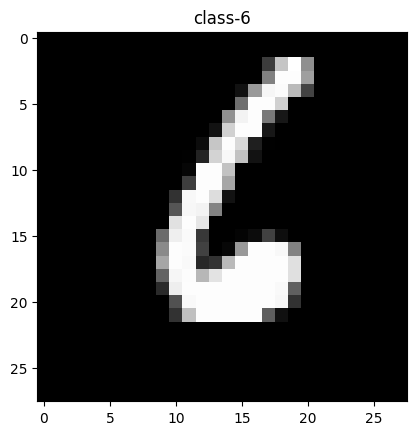

Train image 18199-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  61
  197 255 143   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 129
  253 253 159   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  17 153 246
  251 186  67   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 111 253 253
  208   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 145 243 253 121
   23   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  18 209 253 253  23
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '../mnist/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [3]:
# Your validation set extraction script/code 

# Define the size of the validation set (20%)
validation_set_size = int(len(train_images) * 0.2)
#print(len(train_images))
# Randomly select indices for the validation set
indices = np.random.permutation(len(train_images))


validation_indices=indices[:validation_set_size]
train_indices=indices[validation_set_size:]
# Extract validation images and labels
validation_images = train_images[validation_indices]
train_images_N = train_images[train_indices]


validation_labels = train_labels[validation_indices]
train_labels_N = train_labels[train_indices]


# Print the sizes of the updated training and validation sets
print('Updated Train data (X) size: {}, and labels (Y) size: {}'.format(train_images_N.shape, train_labels_N.shape))
print('Validation data (X) size: {}, and labels (Y) size: {}'.format(validation_images.shape, validation_labels.shape))

Updated Train data (X) size: (48000, 28, 28), and labels (Y) size: (48000,)
Validation data (X) size: (12000, 28, 28), and labels (Y) size: (12000,)


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [4]:
# Your k-NN algorithm script/code 
def distance(x1,x2,p):
    return np.linalg.norm(x1-x2,ord=p,axis=1)
def predict_knn(xtrain, ytrain, xval, k_values, p):
    distances = np.zeros((len(xtrain), len(xval)))
    
    # Compute distances only once
    for i in range(len(xtrain)):
        distances[i] = distance(xtrain[i], xval, p)
    
    predictions = []
    for k in k_values:
        kindices = np.argsort(distances, axis=0)[:k]
        knearest = ytrain[kindices]
        ypred = np.array([np.argmax(np.bincount(labels)) for labels in knearest.T])
        predictions.append(ypred)
    
    return predictions

train_images_flat=train_images_N.reshape(len(train_images_N),-1)
validation_images_flat=validation_images.reshape(len(validation_images),-1)

X_train=train_images_flat
Y_train=train_labels_N
X_val=validation_images_flat
Y_val=validation_labels

#Normalizing
X_train=X_train /255.0
X_val=X_val /255.0

accval = []
kvalz = np.arange(1, 26, 2)
pval = [1, 2, np.inf]
for p in pval:
    predictions = predict_knn(X_train, Y_train, X_val, kvalz, p)
    for k, y_pred in zip(kvalz, predictions):
        acc = np.mean(y_pred == Y_val)
        accval.append([p, k, acc])
        print("For K =", k, "and P =", p, ": Accuracy =", acc)



For K = 1 and P = 1 : Accuracy = 0.9659166666666666
For K = 3 and P = 1 : Accuracy = 0.9665
For K = 5 and P = 1 : Accuracy = 0.96375
For K = 7 and P = 1 : Accuracy = 0.9625
For K = 9 and P = 1 : Accuracy = 0.96175
For K = 11 and P = 1 : Accuracy = 0.96
For K = 13 and P = 1 : Accuracy = 0.95875
For K = 15 and P = 1 : Accuracy = 0.9573333333333334
For K = 17 and P = 1 : Accuracy = 0.9544166666666667
For K = 19 and P = 1 : Accuracy = 0.953
For K = 21 and P = 1 : Accuracy = 0.95225
For K = 23 and P = 1 : Accuracy = 0.95025
For K = 25 and P = 1 : Accuracy = 0.9501666666666667
For K = 1 and P = 2 : Accuracy = 0.9724166666666667
For K = 3 and P = 2 : Accuracy = 0.9726666666666667
For K = 5 and P = 2 : Accuracy = 0.97
For K = 7 and P = 2 : Accuracy = 0.9695
For K = 9 and P = 2 : Accuracy = 0.96825
For K = 11 and P = 2 : Accuracy = 0.96625
For K = 13 and P = 2 : Accuracy = 0.9635833333333333
For K = 15 and P = 2 : Accuracy = 0.9628333333333333
For K = 17 and P = 2 : Accuracy = 0.961666666666666

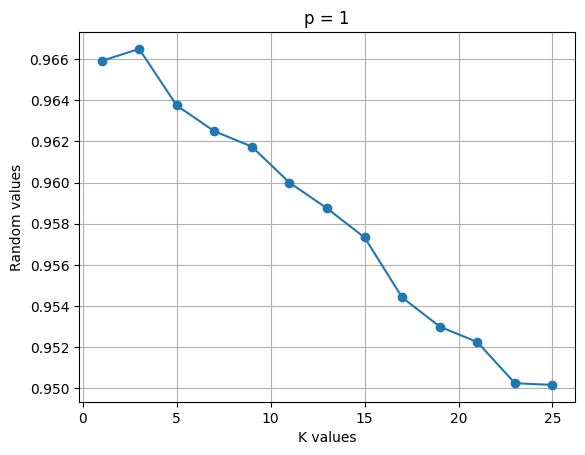

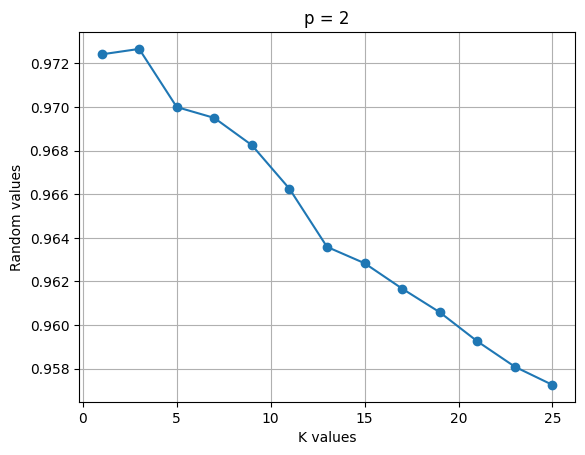

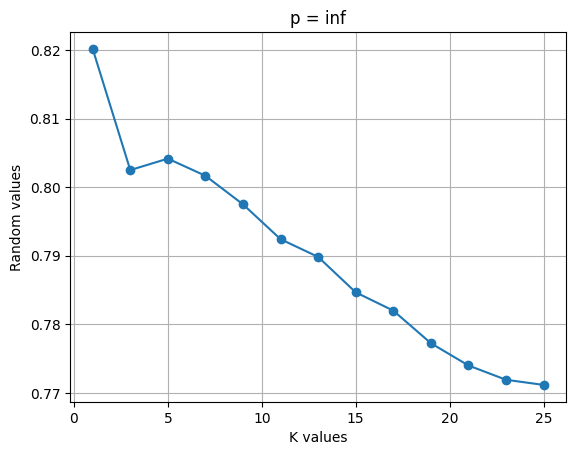

In [5]:
p_values = {}
for item in accval:
    p_value, k_value, acc_value = item
    if p_value not in p_values:
        p_values[p_value] = []
    p_values[p_value].append((k_value, acc_value))

for p_value, values in p_values.items():
    plt.figure()
    plt.title(f'p = {p_value}')
    plt.xlabel('K values')
    plt.ylabel('Random values')
    x = [item[0] for item in values]
    y = [item[1] for item in values]
    plt.plot(x, y, marker='o')
    plt.grid(True)
    plt.show()

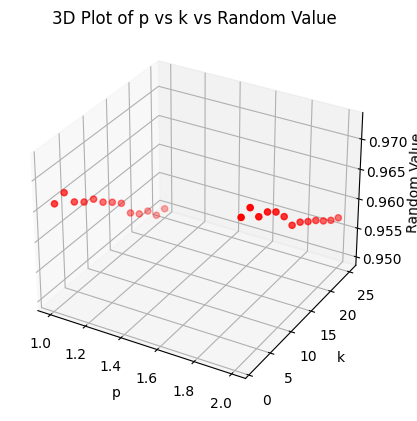

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Your accval array
#accval = [[1, 1, 0.9654166666666667], [1, 3, 0.9661666666666666], [1, 5, 0.9643333333333334], [1, 7, 0.9624166666666667], [1, 9, 0.9625], [1, 11, 0.961], [1, 13, 0.9575833333333333], [1, 15, 0.956], [1, 17, 0.9545], [1, 19, 0.9535833333333333], [1, 21, 0.9524166666666667], [1, 23, 0.9518333333333333], [1, 25, 0.95], [2, 1, 0.97225], [2, 3, 0.9710833333333333], [2, 5, 0.9715833333333334], [2, 7, 0.96925], [2, 9, 0.9680833333333333], [2, 11, 0.9664166666666667], [2, 13, 0.9656666666666667], [2, 15, 0.9645], [2, 17, 0.9629166666666666], [2, 19, 0.96175], [2, 21, 0.96], [2, 23, 0.9589166666666666], [2, 25, 0.9573333333333334], ['inf', 1, 0.8229166666666666], ['inf', 3, 0.8005833333333333], ['inf', 5, 0.80175], ['inf', 7, 0.7986666666666666], ['inf', 9, 0.7946666666666666], ['inf', 11, 0.7900833333333334], ['inf', 13, 0.7863333333333333], ['inf', 15, 0.7840833333333334], ['inf', 17, 0.7815], ['inf', 19, 0.7759166666666667], ['inf', 21, 0.7755833333333333], ['inf', 23, 0.7710833333333333], ['inf', 25, 0.771]]

# Extracting values
p_values = [item[0] if item[0] != 'inf' else float('inf') for item in accval]
k_values = [item[1] for item in accval]
random_values = [item[2] for item in accval]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(p_values, k_values, random_values, c='r', marker='o')

# Set labels and title
ax.set_xlabel('p')
ax.set_ylabel('k')
ax.set_zlabel('Random Value')
ax.set_title('3D Plot of p vs k vs Random Value')

plt.show()


In [7]:
maxvalue = float('-inf')
maxpair = None

for item in accval:
    p, k, ac = item
    if ac > maxvalue:
        maxvalue = ac
        maxpair = (p, k)

print("The (p, k) pair for which the greatest accuracy is obtained:", maxpair," with Accuracy : ",maxvalue)


The (p, k) pair for which the greatest accuracy is obtained: (2, 3)  with Accuracy :  0.9726666666666667


In [8]:

#Running for Test Set with original Training Set
test_images_flat=test_images.reshape(len(test_images),-1)
test_images_flat=test_images_flat /255.0
train_images_1=train_images.reshape(len(train_images),-1)
train_images_1=train_images_1 /255.0

ypreds=predict_knn(train_images_1,train_labels,test_images_flat,[1],2)

In [9]:
acc = np.mean(ypreds[0] == test_labels)
print("For K =", 1, "and P =", 2, ": Accuracy =", acc)

For K = 1 and P = 2 : Accuracy = 0.9691
